# **TP N°01: Simulation **

AZIZ Rezak SIQ3

**1/ Estimer l'integrale suivante par les méthodes de monte Carlo et d'échantillage préferentiel en choisissant une loi gaussienne de moyenne et variance adéquats**
 $$I=\int_0^\pi sinx \, dx$$

In [ ]:
from math import *
import random as rn
def sinus(x):
  return sin(x)

a- On utilise méthode de monté Carlo:


```
# Algorithme de monte carlo 1
nf=0
Pour i allant de 0 a n:
  generer U1 suivant une loi uniforme sur [a,b]
  generer U2 suivant une loi uniforme sur [0,c]
  si U2<sin(U1) alors 
    nf=nf+1
  fsi
FinPour
retourner c*(b-a)*nf/n 
```



```
# Algorithme de monté carlo (moyenne)
s=0
Pour i allant de 1 a n:
  generer U suivant une loi un uniforme sur [a,b]
  s+=f(U)
FinPour
retourner s*(b-a)/n
```





In [ ]:
def integral_monte_carlo1(f,n,a,b,c):
  abcisse=[rn.uniform(a,b) for i in range(n)]
  ordonees=[rn.uniform(0,c) for i in range(n)]
  nf=0
  for i in range(n):
    if ordonees[i]<=f(abcisse[i]):
      nf+=1
  return c*(b-a)*nf/n

def integral_monte_carlo2(f,n,a,b,g):
  #on utilise la moyenne 
  abcisse=[rn.uniform(a,b) for i in range(n)]
  ordonees=[sin(abcisse[i]) for i in range(n)]
  return sum(ordonees)*(b-a)/n



1.999734399085825

b- Importance Sampling:

Dans un premier temps nous allons visualiser l'allure des fonction pour essayer de choisir les meilleures parametres

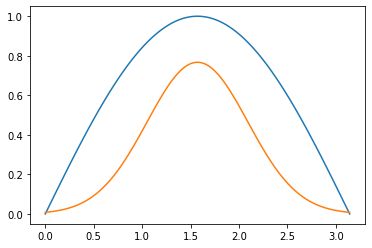

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
x=np.linspace(0,np.pi,100)
y=np.sin(x)
mean = pi/2
std = 0.52

y2 = scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y)
plt.plot(x,y2)

In [ ]:
def gen_n_loi_normale(n,mean,std,a,b):
  x=[]
  i=0
  while i<n:
    U1=rn.uniform(0,1)
    U2=rn.uniform(0,1)
    N1=sqrt(-2*log(U1))*cos(2*pi*U2)
    X=std*N1+mean
    if N1<=b and N1>=a:
      x.append(X)
      i+=1

  return x

def density_loi_normale(x,mean,std):
  return np.exp(-1*(((x-mean)/std)**2)/2)/(std*sqrt(2*pi))


def gen_integrale_sin1(a,b,n):
  nb=0
  for i in range(n):
    x=rn.uniform(a,b)
    y=rn.uniform(0,1)
    if y<=sin(x):
      nb+=1
  return (nb/n)*(b-a)


def gen_integrale_sin_importance_sampling(a,b,n):
  #il faut choisir une densité qui sera presque proportionnelle a |f|
  #d'apres le graphe precident on opte pour mean (b-a)/2 et variance 0.8**2 
  mean = (b-a)/2
  std = 0.51
  x=gen_n_loi_normale(n,mean,std,a,b)
  x=np.array(x)
  yp = density_loi_normale(x,mean,std) 
  y=np.sin(x)
  
  s=y/yp
  return s.sum()/n


gen_integrale_sin_importance_sampling(0,pi,1000000)

2.001510331090317

Comparaison

In [ ]:
import statistics
import pandas as pd
resultats=[]
monteCarlo1=[]
monteCarlo2=[]
importanceSampling=[]
for i in range(1000):
  mc1=integral_monte_carlo1(sinus,10000,0,pi,1)
  mc2=integral_monte_carlo2(sinus,10000,0,pi,1)
  i_s=gen_integrale_sin_importance_sampling(0,pi,10000)
  monteCarlo1.append(mc1)
  monteCarlo2.append(mc2)
  importanceSampling.append(i_s)

resultats.append(statistics.variance(monteCarlo1))
resultats.append(statistics.variance(monteCarlo2))
resultats.append(statistics.variance(importanceSampling))




In [ ]:
d = {'': ['MC:Succes echec', 'Mc: moyenne','Importance Samling'], 'moyenne des résultat': [statistics.mean(monteCarlo1), statistics.mean(monteCarlo2),statistics.mean(importanceSampling)], 'variance':[resultats[0],resultats[1],resultats[2]]}
df = pd.DataFrame(data=d)
print(df)

                       moyenne des résultat  variance
0     MC:Succes echec              2.000446  0.000216
1         Mc: moyenne              2.000163  0.000099
2  Importance Samling              2.001709  0.000171


Resultats:
On remarque que la méthode de Monte carlo utilisant la moyenne donne de bon résultats par rapport au deux autres méthodes. De plus, on remarque que la méthode par importance sampling donne de meilleure résultats par rapport a la méthod de monté carlo par succes echec

2/ Soit la matrice de probabilité de transition d'une chaine de Markov:
$$\begin{bmatrix} 0 & 1 & 0 \\ 0 & 1/2 & 1/2 \\ 1/2 & 0 & 1/2 \end{bmatrix}$$

a- Ecrire un algorithme qui simule les réalisations de cette chaine


```
# algorithme de simulation de chaine de markov
algorithme simualte_CM(P,nb_etat,N):
  X=etat //initial choisi aleatoirement
  X_sim=[X] //X_sim une liste contenant les réalisations
  for _ in range(N):
    i=X //etat precident 
    X=choose_j(i,P) //choisir l'etat suivant
    X_sim.append(X) //ajuter l'etat suivant a la liste 
  return X_sim
```



In [ ]:
def simualte_CM(P,nb_etat,n):
  X=rn.randint(0,nb_etat-1)
  X_sim=[X]
  for _ in range(n):
    i=X
    X=choose_j(i,P)
    X_sim.append(X)
  return X_sim

def choose_j(i,P):
  p=P[i].copy()
  for i in range(1,len(p)):
    p[i]+=p[i-1]
  r=rn.uniform(0,1)
  for i in range(len(p)):
    if r<=p[i]:
      return i

P=[
   [0,1,0],
   [0,1/2,1/2],
   [1/2,0,1/2]
   ]
nb_etat=3
X_sim=simualte_CM(P,3,100)
print(X_sim)

[1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0]


b- Estimation des probabilités de transition 

In [ ]:
X_sim=simualte_CM(P,3,1000000)
P1=[[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]
P1=np.array(P)
for i in range(len(X_sim)-1):
  P1[X_sim[i]][X_sim[i+1]]+=1
for i in range(nb_etat):
  P1[i]=P1[i]/P1[i].sum()

print("Estimation des probabilités de transition")
print(P1)

Estimation des probabilités de transition
[[0.         1.         0.        ]
 [0.         0.50088892 0.49911108]
 [0.50018017 0.         0.49981983]]


On remarque que les probabilité de transition converge vers les vraies vvaleur quand on augmente le nombre n indiquant le nombre de variable simulé